In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
figure = px.line(data, x = "date", y = "meantemp",
                 title="Mean Temperature in Delhi")
figure.show()

In [6]:
figure = px.line(data, x = "date", y = "humidity", title="Humidity in Delhi")
figure.show()

In [11]:
figure = px.line(data, x = "date", y = "wind_speed", title="Wind Speed in Delhi")
figure.show()

#### Interpreting the results
 - [x] From Jan 2013 till July 2015, the wind speed was higher than the average wind speed of the whole period. After 2015, there were no anomalies in wind speed during monsoons.
 

In [15]:
figure = px.scatter(data, x='humidity', y= 'meantemp', size='meantemp', trendline='ols',
                 title="Humidity vs Mean Temperature")
figure.show()

- [x] Negative correlation between temperature and humidity. As the temperature increases, the humidity decreases. This is because of the fact that the air can hold more moisture at higher temperatures.



### Analyzing Temperature Change
- [x] Analyze temperature change in `Delhi` over the years.

In [16]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  month  year
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667      1  2013
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000      1  2013
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667      1  2013
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667      1  2013
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000      1  2013


c:\Users\didit\OneDrive\Desktop\Weather_Forecast\WForecast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\didit\OneDrive\Desktop\Weather_Forecast\WForecast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\didit\OneDrive\Desktop\Weather_Forecast\WForecast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\didit\OneDrive\Desktop\Weather_Forecast\WForecast\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\didit\OneDr

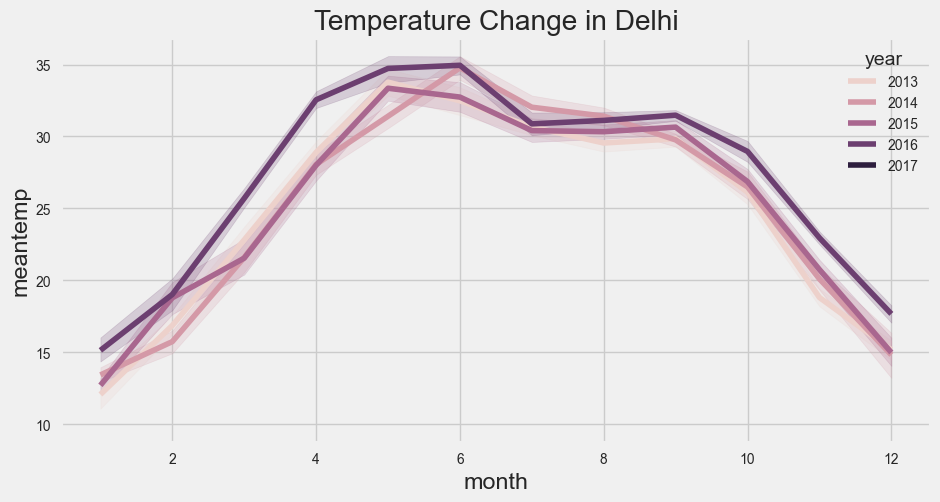

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.title("Temperature Change in Delhi")
sns.lineplot(data=data, x="month", y="meantemp", hue='year')
plt.show()

- [x] All years [2013-2017] had a potential rise in temperature. The temperature in 2015 was the highest in the last 5 years. The temperature in 2016 was the lowest in the last 5 years.
- [x] After duration of 6 months there was a `decline` in temperature in all the years. This is because of the fact that the temperature in Delhi is inversely proportional to the amount of rainfall. The more the rainfall, the lower the temperature.

### Forecasting Weather

- [x] Forecasting the weather using the `ARIMA` model.
- [x] ALternatively useprohet model to forecast the weather.

if you do not have them you can install the libraries

```python
pip install prophet, statsmodels
```


In [21]:
forecast_data =data.rename(columns={'date':'ds', 'meantemp':'y'})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  month  year
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667      1  2013
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000      1  2013
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667      1  2013
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667      1  2013
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000      1  2013
...         ...        ...         ...         ...           ...    ...   ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217     12  2016
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762     12  2016
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762     12  2016
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000     12  2016
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000      1  2017

[1462 rows x 7 columns]


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Sun, 10 Sep 2023   AIC                           5542.478
Time:                        02:48:04   BIC                           5558.339
Sample:                             0   HQIC                          5548.395
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.0

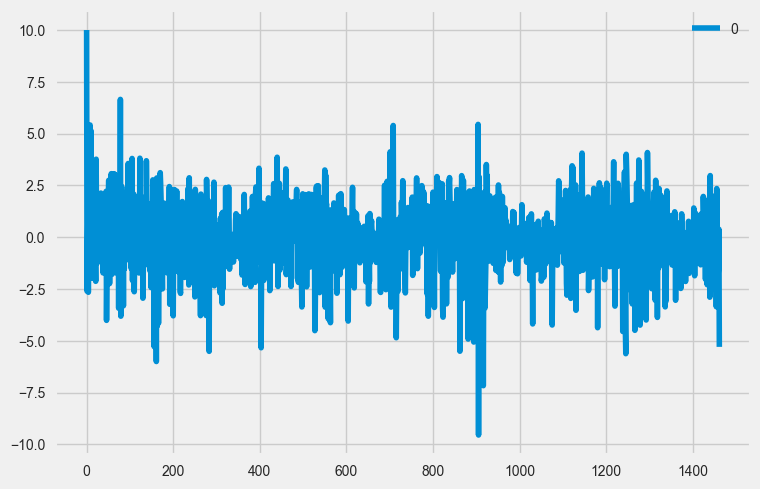

In [24]:
#import ARIMA from statsmodels.tsa.arima_model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(forecast_data['y'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
#plot residual errors and the model
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
future = model.make_future_dataframe(periods=365)
predictions = model.predict(future)
plot_plotly(model, predictions)

02:51:08 - cmdstanpy - INFO - Chain [1] start processing
02:51:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\didit\OneDrive\Desktop\Weather_Forecast\WForecast\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



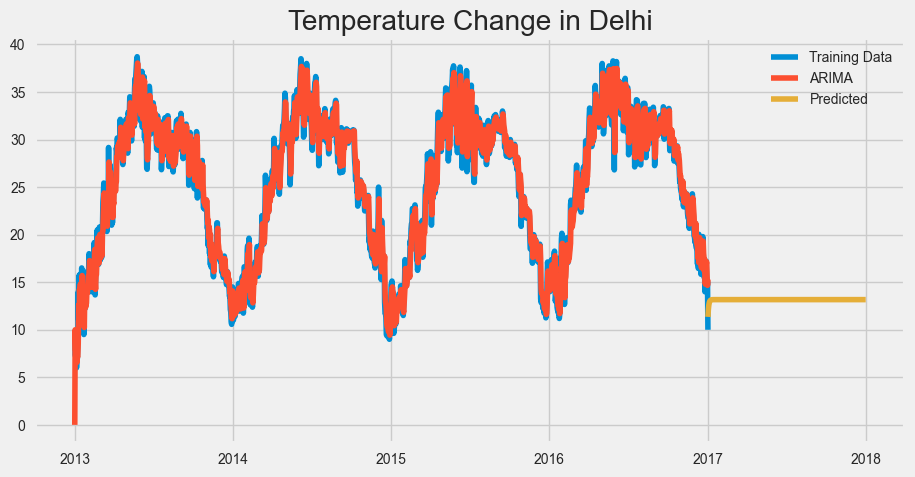

In [32]:
Arima_forecast = model_fit.forecast(steps=365)
#plot the results
plt.figure(figsize=(10, 5))
plt.title("Temperature Change in Delhi")
plt.plot(forecast_data['ds'], forecast_data['y'], label='Training Data')
plt.plot(forecast_data['ds'], model_fit.fittedvalues, label='ARIMA')
plt.plot(pd.date_range(start=forecast_data['ds'].iloc[-1], periods=365, freq='D'), Arima_forecast, label='Predicted')
plt.legend()
plt.show()